# BELTRANS statistics

This notebook displays statistics about the BELTRANS corpus. It aims to measure the improvement performed by different data integration or enrichment techniques.


In [1]:
import pandas as pd
import utils
from datetime import datetime

## Existing measurements

The measured statistics currently evolve like this:



In [2]:
translationMeasurementFiles = [
    '2022-05-03-translation-stats.csv', '2022-05-09-translation-stats.csv', 
    '2022-05-23-translation-stats.csv', '2022-06-07-translation-stats.csv',
    '2022-06-16-translation-stats.csv', '2022-06-20-translation-stats.csv',
    '2022-06-23-translation-stats.csv'
]

In [3]:
translationStats = utils.mergeMeasurementsToDataFrame('.', translationMeasurementFiles)
statsFRNL = translationStats[translationStats['corpus'] == 'FR-NL']
statsNLFR = translationStats[translationStats['corpus'] == 'NL-FR']
statsOther = translationStats[translationStats['corpus'] == 'OTHER']

## Identifiers
The total number of translations and how much have which third party identifier.

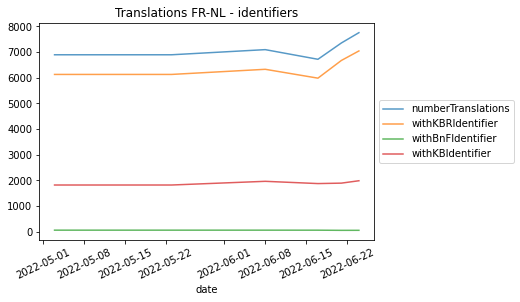

In [4]:
utils.plotTranslationStatsIdentifiers(statsFRNL, 'Translations FR-NL - identifiers')

In [5]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                      |
|:-----------|:-----------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                 |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246. |
| 2022-05-23 | No changes to previous version.                                                                                              |
| 2022-06-08 | Added publishing directors and included a column for source titles from KB.                                                  |
| 2022-06-17 | Removed duplicate manifestations with the same ISBN10/ISBN13 (different editions).                                           |
| 2022-06-21 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL.                                           |
| 2022-06-24 | No ISBN duplicate removal anymore to prevent data loss                                                                       |

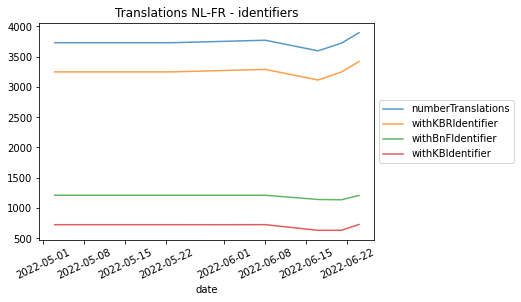

In [6]:
utils.plotTranslationStatsIdentifiers(statsNLFR, 'Translations NL-FR - identifiers')

## ISBN identifiers
The total number of translations and how many have ISBN10/ISBN13.

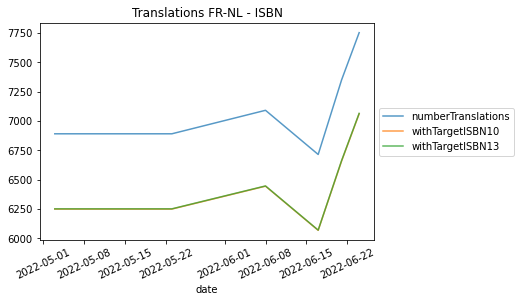

In [7]:
utils.plotTranslationStatsISBN(statsFRNL, 'Translations FR-NL - ISBN')

In [8]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                      |
|:-----------|:-----------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                 |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246. |
| 2022-05-23 | No changes to previous version.                                                                                              |
| 2022-06-08 | Added publishing directors and included a column for source titles from KB.                                                  |
| 2022-06-17 | Removed duplicate manifestations with the same ISBN10/ISBN13 (different editions).                                           |
| 2022-06-21 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL.                                           |
| 2022-06-24 | No ISBN duplicate removal anymore to prevent data loss                                                                       |

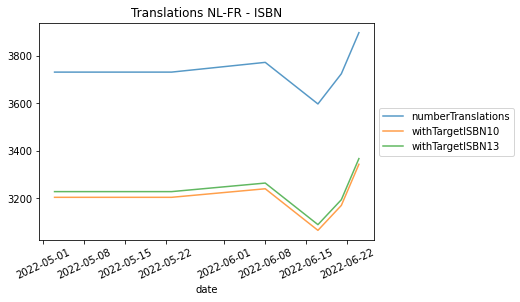

In [9]:
utils.plotTranslationStatsISBN(statsNLFR, 'Translations NL-FR - ISBN')

## Information about original of translation (source)
The total number of translation and for how many we have which kind of information for the original.

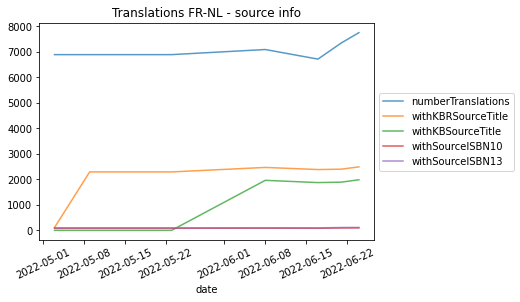

In [10]:
utils.plotTranslationStatsSources(statsFRNL, 'Translations FR-NL - source info')

In [11]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                      |
|:-----------|:-----------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                 |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246. |
| 2022-05-23 | No changes to previous version.                                                                                              |
| 2022-06-08 | Added publishing directors and included a column for source titles from KB.                                                  |
| 2022-06-17 | Removed duplicate manifestations with the same ISBN10/ISBN13 (different editions).                                           |
| 2022-06-21 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL.                                           |
| 2022-06-24 | No ISBN duplicate removal anymore to prevent data loss                                                                       |

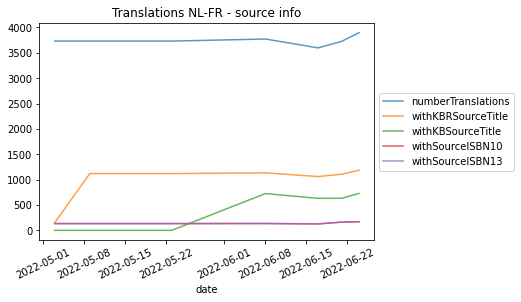

In [12]:
utils.plotTranslationStatsSources(statsNLFR, 'Translations NL-FR - source info')

In [13]:
statsNLFR

,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withBBThesaurusID,withSourceKBRIdentifier,withKBRSourceTitle,withKBSourceTitle,withSourceISBN10,withSourceISBN13,comment,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withBnFAndKBIdentifier
date,,,,,,,,,,,,,,,,,,
2022-05-03,NL-FR,3731,3204,3228,3249,1211,724,2687,149,149,0,133,134,"Data integrated from KBR, BnF and KB based on ...",NaN,NaN,NaN,NaN
2022-05-09,NL-FR,3731,3204,3228,3249,1211,724,2687,149,1119,0,133,134,"Data integrated from KBR, BnF and KB based on ...",NaN,NaN,NaN,NaN
2022-05-23,NL-FR,3731,3204,3228,3249,1211,724,2687,149,1119,0,133,134,No changes to previous version.,NaN,NaN,NaN,NaN
2022-06-08,NL-FR,3772,3240,3264,3290,1211,725,2727,150,1134,725,134,135,Added publishing directors and included a colu...,NaN,NaN,NaN,NaN
2022-06-17,NL-FR,3597,3065,3089,3115,1141,631,2601,142,1060,631,127,127,Removed duplicate manifestations with the same...,NaN,NaN,NaN,NaN
2022-06-21,NL-FR,3724,3170,3194,3247,1136,632,2717,182,1106,632,161,163,New KBR data dump with plenty of additions and...,NaN,NaN,NaN,NaN
2022-06-24,NL-FR,3897,3343,3367,3420,1207,728,2847,190,1185,728,169,171,No ISBN duplicate removal anymore to prevent d...,208.0,928.0,491.0,247.0


In [14]:
statsFRNL

,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withBBThesaurusID,withSourceKBRIdentifier,withKBRSourceTitle,withKBSourceTitle,withSourceISBN10,withSourceISBN13,comment,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withBnFAndKBIdentifier
date,,,,,,,,,,,,,,,,,,
2022-05-03,FR-NL,6891,6250,6252,6125,58,1817,5970,111,111,0,80,97,"Data integrated from KBR, BnF and KB based on ...",NaN,NaN,NaN,NaN
2022-05-09,FR-NL,6891,6250,6252,6125,58,1817,5970,111,2291,0,80,97,"Data integrated from KBR, BnF and KB based on ...",NaN,NaN,NaN,NaN
2022-05-23,FR-NL,6891,6250,6252,6125,58,1817,5970,111,2291,0,80,97,No changes to previous version.,NaN,NaN,NaN,NaN
2022-06-08,FR-NL,7091,6445,6447,6325,58,1961,6168,116,2467,1961,84,101,Added publishing directors and included a colu...,NaN,NaN,NaN,NaN
2022-06-17,FR-NL,6715,6069,6071,5980,57,1873,5842,112,2384,1873,80,97,Removed duplicate manifestations with the same...,NaN,NaN,NaN,NaN
2022-06-21,FR-NL,7350,6659,6663,6669,51,1890,6524,127,2399,1890,93,111,New KBR data dump with plenty of additions and...,NaN,NaN,NaN,NaN
2022-06-24,FR-NL,7752,7061,7065,7040,52,1983,6881,131,2489,1983,96,114,No ISBN duplicate removal anymore to prevent d...,4.0,13.0,1310.0,4.0


## All statistics for the 'other' corpus
Compared to above things are only in one graph

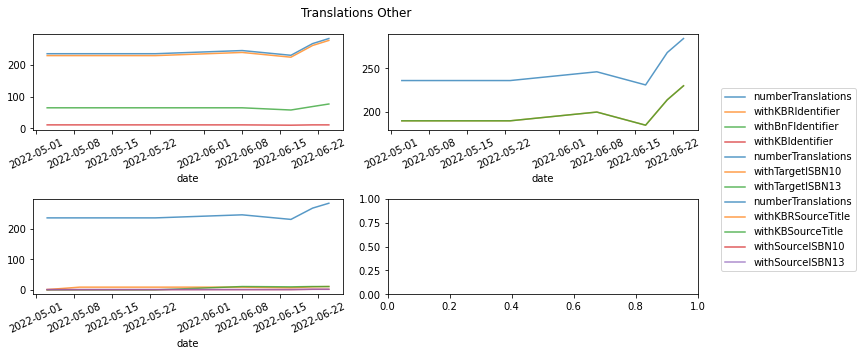

In [15]:
utils.plotTranslationStats(statsOther, 'Translations Other')

In [16]:
contributorMeasurementFiles = [
    '2022-05-03-person-contributor-stats.csv', '2022-05-23-person-contributor-stats.csv',
    '2022-06-16-person-contributor-stats.csv', '2022-05-09-person-contributor-stats.csv',
    '2022-06-07-person-contributor-stats.csv', '2022-06-20-person-contributor-stats.csv',
    '2022-06-23-person-contributor-stats.csv'
]